In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import string
from nltk.corpus import stopwords

stopw = stopwords.words('english')
stopw.extend(list(string.ascii_lowercase))
stopw.extend(['0','1','2','3','4','5','6','7','8','9'])
punctuation = string.punctuation + '1234567890Â©á»áº¯ÄÃ' + '¢`~¡¢£¤¥¦§¨©ª«¬®¯°±²³´µ¶·¸¹º»¼½¾¿×÷¢£¤¥¦§©´µ¶·¸¹º€£¥₹₽₿₣₱₩₨₫₮₭₣₢₥₦₠₡₧₤₮₯₰₲₱₴₵₸₹₺₻₼₽₿'

def my_review_filter(review):
    stopwords_lower = set(stopw)
    cleaned_review = (''.join(ch for ch in review if ch not in punctuation)).lower()
    filtered_words = [word for word in cleaned_review.split() if word not in stopwords_lower]
    return filtered_words

df1 = pd.read_csv(r'../Dataset/pos_label.csv',encoding='UTF-8')
df2 = pd.read_csv(r'../Dataset/neg_label.csv',encoding='UTF-8')
df = pd.concat([df1,df2], ignore_index=True)
# df=df3


In [2]:
vector =cv(analyzer=my_review_filter, dtype=np.uint8)
X_train = vector.fit_transform(df['Comment'])
y_train = df['Label']
X_train.shape

(200000, 359857)

In [3]:
print(list(vector.vocabulary_.keys())[:10])

['cute', 'colorful', 'fun', 'bookthis', 'great', 'little', 'book', 'babies', 'toddlers', 'pictures']


In [8]:
df3=pd.read_csv(r'../Dataset/test.csv')
X_test= vector.transform(df3['Comment'])
y_test=df3['Label']

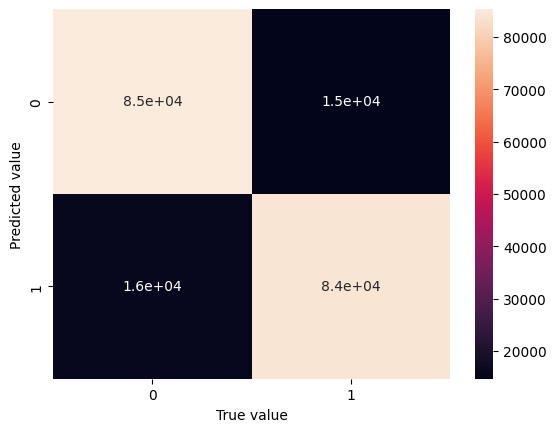

              precision    recall  f1-score   support

           0       0.84      0.85      0.85    100000
           1       0.85      0.84      0.85    100000

    accuracy                           0.85    200000
   macro avg       0.85      0.85      0.85    200000
weighted avg       0.85      0.85      0.85    200000



In [5]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show()

print(classification_report(y_test, y_predict_test))

In [6]:
def get_confidence_scores(X):
    confidence_scores = NB_classifier.predict_proba(X)
    return confidence_scores

In [7]:
l = ["wow that's beatiful","that's awful", 'for real?', 'nice', 'awsome product, should buy this', 'not worth it']
X_input = vector.transform(l)
res = NB_classifier.predict(X_input)
confidence_scores = get_confidence_scores(X_input)

for i in range(len(l)):
    print(f"The predicted value for {l[i]} is: ", end="")
    n = res[i]
    if n == 1:
        print(f'POSITIVE (confidence: {100*confidence_scores[i][1]:.2f})')
    else:
        print(f'NEGATIVE (confidence: {100*confidence_scores[i][0]:.2f})')


The predicted value for wow that's beatiful is: POSITIVE (confidence: 84.64)
The predicted value for that's awful is: NEGATIVE (confidence: 94.65)
The predicted value for for real? is: NEGATIVE (confidence: 50.41)
The predicted value for nice is: POSITIVE (confidence: 64.13)
The predicted value for awsome product, should buy this is: POSITIVE (confidence: 75.97)
The predicted value for not worth it is: NEGATIVE (confidence: 50.45)
